In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [280]:
data = pd.read_csv('/content/cac_merged_20231106191438_004.csv')

In [281]:
data.drop(columns="Unnamed: 0", inplace=True)

In [282]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,num_cars_owned,yearly_income,num_children_at_home,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Snack Foods,Snack Foods,Food,6.40,2.1120,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Nationeel,3.20,18.9,16.8,1,0,33,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
1,Hygiene,Health and Hygiene,Non-Consumable,3.20,1.5680,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Hilltop,1.60,19.8,17.7,1,0,29,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
2,Carbonated Beverages,Beverages,Drink,4.68,1.8252,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Fabulous,2.34,17.7,14.7,0,0,13,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
3,Decongestants,Health and Hygiene,Non-Consumable,1.08,0.3240,2,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Bird Call,0.54,17.3,16.2,1,0,15,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19
4,Bread,Baked Goods,Food,0.93,0.3999,1,Go For It,USA,M,F,3,Bachelors Degree,Golden,Management,Y,3,$50K - $70K,0,Great,0.93,13.6,11.6,1,0,30,Small Grocery,Bellingham,WA,28206.0,22271.0,3561.0,2374.0,1,0,0,0,0,Radio,228.19


In [283]:
print('Number of rows = {} and features = {}'.format(data.shape[0],data.shape[1]-1))

Number of rows = 70751 and features = 38


# Check for missing values

In [284]:
data.isna().sum()

food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
num_cars_owned              0
yearly_income               0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar                  0
video_stor

# Check for duplicate records

In [285]:
data.duplicated().value_counts()

False    70751
dtype: int64

# Lets seperate target variable and divide the data into train and test to avoid data leakage

In [286]:
X = data.drop(columns='cost')
y = data['cost']

In [287]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [288]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('Y_train shape = ',Y_train.shape)
print('Y_test shape = ',Y_test.shape)

X_train shape =  (56600, 38)
X_test shape =  (14151, 38)
Y_train shape =  (56600,)
Y_test shape =  (14151,)


# Let us encode and scale X_train first then followed by X_test

# List catergorical and numerical features

In [289]:
categorical_features = X_train.select_dtypes(exclude=["number"]).columns.tolist()
categorical_features

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [290]:
numerical_features = X_train.select_dtypes(include=["number"]).columns.tolist()
numerical_features

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [291]:
len(categorical_features)+len(numerical_features)

38

In [292]:
pure_numeric = ['store_sales(in millions)',
 'store_cost(in millions)',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft']

for col in pure_numeric:
  print('-'*30)
  print(col)
  print('-'*30)
  print(len(X_train[col].value_counts()))
  print()

------------------------------
store_sales(in millions)
------------------------------
1031

------------------------------
store_cost(in millions)
------------------------------
9861

------------------------------
SRP
------------------------------
315

------------------------------
gross_weight
------------------------------
376

------------------------------
net_weight
------------------------------
332

------------------------------
units_per_case
------------------------------
36

------------------------------
store_sqft
------------------------------
21

------------------------------
grocery_sqft
------------------------------
21

------------------------------
frozen_sqft
------------------------------
21

------------------------------
meat_sqft
------------------------------
21



In [293]:
X_train[pure_numeric]

,store_sales(in millions),store_cost(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft
53549,11.46,5.5008,3.82,18.50,16.50,29,38382.0,30351.0,4819.0,3213.0
651,1.49,0.7450,1.49,21.70,19.70,19,28206.0,22271.0,3561.0,2374.0
54531,3.84,1.6512,1.28,6.18,4.17,1,21215.0,13305.0,4746.0,3164.0
58250,7.41,3.3345,2.47,20.10,19.10,34,21215.0,13305.0,4746.0,3164.0
17228,4.60,1.5640,1.15,21.70,19.70,35,20319.0,16232.0,2452.0,1635.0
...,...,...,...,...,...,...,...,...,...,...
49100,1.89,0.6615,0.63,11.60,9.60,26,34791.0,26354.0,5062.0,3375.0
20609,5.20,1.9240,1.30,14.50,12.50,32,27694.0,18670.0,5415.0,3610.0
21440,7.20,2.8080,1.80,13.20,11.10,24,27694.0,18670.0,5415.0,3610.0
50057,10.28,4.0092,2.57,15.20,13.10,6,30584.0,21938.0,5188.0,3458.0


In [294]:
# numerical valued features which might be actually categorical features
cat_num_features = [
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',]
X_train[cat_num_features]

,unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,prepared_food,florist
53549,3,1,1,0,1,0,0,0,0,0,0
651,1,5,1,1,0,1,1,0,0,0,0
54531,3,3,2,3,1,0,1,0,0,0,0
58250,3,2,0,2,0,0,1,0,0,0,0
17228,4,3,3,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49100,3,3,2,0,0,0,0,0,1,1,0
20609,4,1,3,0,1,0,1,1,1,1,1
21440,4,3,4,3,0,0,1,1,1,1,1
50057,4,5,3,0,1,0,1,1,1,1,1


In [295]:
for col in cat_num_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(X_train[col].value_counts())

------------------------------
unit_sales(in millions)
------------------------------
3    25549
4    15457
2    12664
5     1979
1      930
6       21
Name: unit_sales(in millions), dtype: int64
------------------------------
total_children
------------------------------
2    11640
4    11632
3    11264
1    10908
5     5924
0     5232
Name: total_children, dtype: int64
------------------------------
num_cars_owned
------------------------------
2    17249
3    15846
1    12713
4     7531
0     3261
Name: num_cars_owned, dtype: int64
------------------------------
num_children_at_home
------------------------------
0    35293
1     8165
2     5506
3     4028
4     2405
5     1203
Name: num_children_at_home, dtype: int64
------------------------------
recyclable_package
------------------------------
1    31596
0    25004
Name: recyclable_package, dtype: int64
------------------------------
low_fat
------------------------------
0    36768
1    19832
Name: low_fat, dtype: int64
-------

# Listing all the different categories in categorical variables

In [296]:
for col in categorical_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(X_train[col].value_counts())

------------------------------
food_category
------------------------------
Vegetables              7013
Snack Foods             6468
Dairy                   3635
Meat                    2901
Fruit                   2866
Jams and Jellies        2399
Breakfast Foods         1855
Baking Goods            1817
Bread                   1681
Canned Soup             1599
Beer and Wine           1474
Bathroom Products       1461
Paper Products          1445
Electrical              1437
Candy                   1413
Frozen Desserts         1338
Specialty               1102
Starchy Foods           1048
Magazines                928
Kitchen Products         920
Eggs                     879
Hot Beverages            838
Pizza                    798
Hygiene                  773
Pain Relievers           771
Carbonated Beverages     760
Pure Juice Beverages     702
Cleaning Supplies        692
Side Dishes              560
Drinks                   556
Frozen Entrees           546
Plastic Products         

In [297]:
bin_cat_col = list()
for col in categorical_features:
  if(len(X_train[col].value_counts())==2):
    print(col)
    bin_cat_col.append(col)



marital_status
gender
houseowner


In [298]:
X_train[bin_cat_col]

,marital_status,gender,houseowner
53549,S,F,N
651,M,F,Y
54531,M,F,N
58250,M,F,Y
17228,M,F,Y
...,...,...,...
49100,S,M,Y
20609,S,F,N
21440,M,M,Y
50057,S,M,Y


In [299]:
X_train['marital_status'] = X_train['marital_status'].replace({'M':1,'S':0})
X_train['gender'] = X_train['gender'].replace({'F':1,'M':0})
X_train['houseowner'] = X_train['houseowner'].replace({'Y':1,'N':0})
X_train[bin_cat_col]

,marital_status,gender,houseowner
53549,0,1,0
651,1,1,1
54531,1,1,0
58250,1,1,1
17228,1,1,1
...,...,...,...
49100,0,0,1
20609,0,1,0
21440,1,0,1
50057,0,0,1


In [300]:
X_test['marital_status'] = X_test['marital_status'].replace({'M':1,'S':0})
X_test['gender'] = X_test['gender'].replace({'F':1,'M':0})
X_test['houseowner'] = X_test['houseowner'].replace({'Y':1,'N':0})
X_test[bin_cat_col]

,marital_status,gender,houseowner
66578,0,1,0
22325,1,0,1
33627,0,1,0
1045,1,0,0
68410,0,0,1
...,...,...,...
9624,0,0,1
37217,1,1,0
57141,0,1,1
3132,0,1,1


In [301]:
Non_bin_cat_col = list(set(categorical_features)-set(bin_cat_col))
Non_bin_cat_col

['promotion_name',
 'media_type',
 'store_state',
 'store_city',
 'food_department',
 'store_type',
 'occupation',
 'food_category',
 'sales_country',
 'member_card',
 'education',
 'yearly_income',
 'food_family',
 'brand_name']

In [302]:
ordinal_cols = ['education', 'member_card', 'occupation','yearly_income','store_type']
nominal_cols = list(set(Non_bin_cat_col)-set(ordinal_cols))

In [303]:
len(Non_bin_cat_col)==len(ordinal_cols)+len(nominal_cols)

True

In [304]:
print('ordinal columns:')
print(ordinal_cols)
print('nominal columns')
print(nominal_cols)

ordinal columns:
['education', 'member_card', 'occupation', 'yearly_income', 'store_type']
nominal columns
['promotion_name', 'food_category', 'media_type', 'store_state', 'sales_country', 'brand_name', 'food_family', 'store_city', 'food_department']


In [305]:
X_train_ordinal=X_train[ordinal_cols]
X_test_ordinal=X_test[ordinal_cols]

In [306]:
# ordinal variables are encoded using ordinal encoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train_ordinal)
X_train_ordinal = ordinal_encoder.transform(X_train_ordinal)
X_test_ordinal = ordinal_encoder.transform(X_test_ordinal)

In [308]:
X_train_ordinal = pd.DataFrame(X_train_ordinal, columns=ordinal_cols)
X_test_ordinal = pd.DataFrame(X_test_ordinal, columns=ordinal_cols)

In [309]:
X_train_nominal = X_train[nominal_cols]
X_test_nominal = X_test[nominal_cols]

In [310]:
# nominal variables are encoded using onehotencoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train_nominal)
X_train_nominal = onehot_encoder.transform(X_train_nominal)
X_test_nominal = onehot_encoder.transform(X_test_nominal)

In [311]:
X_train_nominal = pd.DataFrame.sparse.from_spmatrix(X_train_nominal)
X_test_nominal = pd.DataFrame.sparse.from_spmatrix(X_test_nominal)

In [312]:
# lets drop the non binary not encoded categorical columns
X_train.drop(columns=Non_bin_cat_col, inplace=True)
X_test.drop(columns=Non_bin_cat_col, inplace=True)

In [313]:
# lets add the ordinal and nominal encoded columns to X_train and X_test
X_train_new = pd.concat([X_train.reset_index(drop=True), X_train_ordinal.reset_index(drop=True), X_train_nominal.reset_index(drop=True)], axis=1)
X_test_new = pd.concat([X_test.reset_index(drop=True), X_test_ordinal.reset_index(drop=True), X_test_nominal.reset_index(drop=True)], axis=1)

In [314]:
print('X_train shape after categorical columns encoding = ', X_train_new.shape)
print('X_test shape after categorical columns encoding = ', X_test_new.shape)

X_train shape after categorical columns encoding =  (56600, 308)
X_test shape after categorical columns encoding =  (14151, 308)


# Outlier Analysis

In [317]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test_new.columns = X_test_new.columns.astype(str)

In [328]:
# lets get the outliers in X_train
local_outlier_factor = LocalOutlierFactor()
y_outlier_pred = local_outlier_factor.fit_predict(X_train)

In [329]:
# predicts 1(not outlier) or -1(outlier) using KNN algorithm in background
y_outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [330]:
not_outliers = y_outlier_pred != -1

In [331]:
not_outliers = pd.DataFrame(not_outliers, columns=['not_outlier'])

In [332]:
not_outliers.head()

,not_outlier
0,True
1,True
2,True
3,True
4,True


In [333]:
not_outliers.shape

(56600, 1)

In [334]:
# Not outliers = True and Outliers = False
not_outliers['not_outlier'].value_counts()

True     56582
False       18
Name: not_outlier, dtype: int64

In [335]:
not_outliers.isna().sum()

not_outlier    0
dtype: int64

In [336]:
# lets remove the 18 outliers from X_train and Y_train
X_train_new['not_outlier'] = not_outliers

In [337]:
# sample outliers in X_train
X_train_new[X_train_new['not_outlier']==False]

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),marital_status,gender,total_children,houseowner,num_cars_owned,num_children_at_home,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,education,member_card,occupation,yearly_income,store_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,not_outlier
10670,17.50,8.7500,5,0,0,4,1,2,0,3.50,21.80,20.70,1,0,1,27694.0,18670.0,5415.0,3610.0,1,1,1,1,1,2.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
11446,18.70,8.7890,5,1,1,4,1,4,4,3.74,21.30,19.20,0,1,24,23688.0,15337.0,5011.0,3340.0,1,1,1,1,1,4.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
13512,17.50,8.4000,5,1,0,5,0,3,2,3.50,21.80,20.70,1,0,1,23688.0,15337.0,5011.0,3340.0,1,1,1,1,1,2.0,0.0,2.0,4.0,1.0,0.

In [338]:
Y_train.shape

(56600,)

In [339]:
Y_train = pd.concat([Y_train.reset_index(drop=True), not_outliers.reset_index(drop=True)],axis=1)
Y_train.head()

,cost,not_outlier
0,186.76,True
1,547.52,True
2,17.22,True
3,104.39,True
4,81.71,True


In [340]:
X_train_new.shape, Y_train.shape

((56600, 309), (56600, 2))

In [341]:
X_train_new = X_train_new[X_train_new['not_outlier']]

In [342]:
X_train_new['not_outlier'].value_counts()

True    56582
Name: not_outlier, dtype: int64

In [343]:
Y_train = Y_train[Y_train['not_outlier']]

In [344]:
Y_train['not_outlier'].value_counts()

True    56582
Name: not_outlier, dtype: int64

In [345]:
X_train_new.drop(columns=['not_outlier'],inplace=True)
Y_train.drop(columns=['not_outlier'],inplace=True)

In [346]:
X_train_new.shape, Y_train.shape

((56582, 308), (56582, 1))

# lets generate two sets of X_train one with numeric columns being standardized and one with numeric columns being normalized

In [237]:
X_train_num = X_train_new[pure_numeric]
X_test_num = X_test_new[pure_numeric]

In [238]:
std_scalar = StandardScaler()
std_scalar.fit(X_train_num)
X_train_std_num = std_scalar.transform(X_train_num)
X_test_std_num = std_scalar.transform(X_test_num)

In [239]:
X_train_std_num = pd.DataFrame(X_train_std_num,columns=X_train_num.columns)
X_train_std_num

,store_sales(in millions),store_cost(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft
0,1.425700,1.988580,1.830916,1.015162,1.003507,0.987099,1.969674,3.028621,-0.303361,-0.302957
1,-1.448987,-1.281134,-0.664927,1.707401,1.686454,0.012978,0.039826,0.836952,-1.162921,-1.162958
2,-0.771403,-0.658102,-0.889874,-1.649960,-1.627973,-1.740442,-1.285996,-1.595042,-0.353240,-0.353183
3,0.257948,0.499203,0.384827,1.361281,1.558401,1.474160,-1.285996,-1.595042,-0.353240,-0.353183
4,-0.552269,-0.718054,-1.029127,1.707401,1.686454,1.571572,-1.455920,-0.801104,-1.920673,-1.920456
...,...,...,...,...,...,...,...,...,...,...
56577,-1.333654,-1.338542,-1.586139,-0.477480,-0.469097,0.694863,1.288652,1.944450,-0.137326,-0.136902
56578,-0.379269,-0.470546,-0.868450,0.149862,0.149823,1.279336,-0.057273,-0.139806,0.103870,0.103981
56579,0.197398,0.137223,-0.332862,-0.131360,-0.148966,0.500038,-0.057273,-0.139806,0.103870,0.103981
56580,1.085466,0.963073,0.491945,0.301290,0.277876,-1.253381,0.490807,0.746627,-0.051233,-0.051824


In [240]:
X_test_std_num = pd.DataFrame(X_test_std_num,columns=X_test_num.columns)
X_test_std_num

,store_sales(in millions),store_cost(in millions),SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft
0,1.996600,1.995180,1.338175,1.426179,1.387665,-0.668908,-0.008724,0.059696,-0.202237,-0.202504
1,-0.598403,-0.328092,-0.675638,0.041700,-0.170308,1.474160,-0.057273,-0.139806,0.103870,0.103981
2,-0.425403,-0.234039,-0.911297,-0.347685,-0.148966,-0.181847,1.111711,0.796807,1.214875,1.215115
3,-0.367736,-0.532423,0.545504,-1.334126,-1.316378,1.084511,2.218870,1.411722,2.679133,2.678860
4,-0.866553,-0.828057,-1.007703,0.863734,1.046191,1.376748,-0.008724,0.059696,-0.202237,-0.202504
...,...,...,...,...,...,...,...,...,...,...
14146,-1.002070,-0.769205,-1.446886,-0.520745,-0.513916,-1.448205,-0.816999,-1.043869,-0.172173,-0.172778
14147,1.970650,2.336947,0.599063,-0.261155,-0.255676,0.694863,-0.803534,-0.635101,-0.761155,-0.761146
14148,-0.979003,-1.106916,-0.589944,1.750666,1.707796,1.181924,-1.285996,-1.595042,-0.353240,-0.353183
14149,-0.425403,-0.234039,-0.461403,-1.675919,-1.867004,1.084511,2.218870,1.411722,2.679133,2.678860


In [234]:
X_train_non_num = list(set(X_train_new.columns )-set(X_train_std_num.columns))
X_train_nn = X_train_new[X_train_non_num]
X_train_std = pd.concat([X_train_nn.reset_index(drop=True),X_train_std_num.reset_index(drop=True)],axis=1)

In [242]:
X_test_non_num = list(set(X_test_new.columns)-set(X_test_std_num.columns))
X_test_nn = X_test_new[X_test_non_num]
X_test_std = pd.concat([X_test_nn.reset_index(drop=True),X_test_std_num.reset_index(drop=True)],axis=1)

In [243]:
X_train_std.shape, X_test_std.shape

((56582, 308), (14151, 308))

In [246]:
Y_train.shape, Y_test.shape

((56582, 1), (14151,))

In [247]:
X_train_std.to_csv('X_train_std.csv')
X_test_std.to_csv('X_test_std.csv')
Y_train.to_csv('Y_train.csv')
Y_test.to_csv('Y_test.csv')

In [250]:
X_train_std = X_train_std.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [251]:
X_test_std = X_test_std.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Feature selection: Retain p-significant features

In [252]:
import statsmodels.api as sm

def get_p_significant_features(X,y):
  X = sm.add_constant(X)
  ols_model = sm.OLS(y, X).fit()

  p_features = {}
  for i in X.columns.tolist():
    p_features[f'{i}'] = ols_model.pvalues[i]

  data_p_value= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
  print('-'*50)
  print('p-significant columns/features')
  print('-'*50)
  print(data_p_value[data_p_value['p-Value'] < 0.05])
  significant_features = data_p_value[data_p_value['p-Value']<0.05]['Feature_name'].tolist()

  return significant_features


X_train_significant = get_p_significant_features(X_train_std,Y_train)
print(X_train_significant)

--------------------------------------------------
p-significant columns/features
--------------------------------------------------
       Feature_name   p-Value
0             const  0.000000
1               111  0.000000
2               112  0.000000
3               114  0.000000
4               118  0.000000
..              ...       ...
136             261  0.031118
137              73  0.032836
138             200  0.033256
139             152  0.033877
140  marital_status  0.046174

[141 rows x 2 columns]
['const', '111', '112', '114', '118', '119', '234', '235', '237', '239', '110', '240', '248', '249', '250', '251', '252', '255', 'coffee_bar', 'florist', 'salad_bar', '245', '108', '236', 'meat_sqft', 'frozen_sqft', '116', '232', 'prepared_food', '115', '242', '233', '109', 'store_sqft', '103', '48', '105', '7', '12', '95', '231', '10', '4', '47', '254', '20', '9', '27', '96', '247', '34', '31', '107', '117', '41', '18', '16', '25', '253', '33', '100', '13', '102', '29', '32', '

In [253]:
num_col_list = list()
str_col_list = list()
for col in X_train_significant:
  if(col.isdigit()):
    num_col_list.append(int(col))
  else:
    str_col_list.append(col)

print(num_col_list)
print(str_col_list)

[111, 112, 114, 118, 119, 234, 235, 237, 239, 110, 240, 248, 249, 250, 251, 252, 255, 245, 108, 236, 116, 232, 115, 242, 233, 109, 103, 48, 105, 7, 12, 95, 231, 10, 4, 47, 254, 20, 9, 27, 96, 247, 34, 31, 107, 117, 41, 18, 16, 25, 253, 33, 100, 13, 102, 29, 32, 256, 37, 238, 94, 26, 36, 42, 99, 246, 28, 40, 0, 6, 97, 106, 276, 90, 45, 46, 266, 66, 243, 278, 92, 259, 15, 44, 11, 52, 258, 24, 35, 271, 79, 273, 39, 269, 104, 88, 275, 209, 128, 244, 113, 5, 268, 69, 178, 14, 19, 17, 262, 77, 150, 55, 277, 43, 91, 187, 93, 216, 134, 156, 101, 214, 120, 197, 261, 73, 200, 152]
['const', 'coffee_bar', 'florist', 'salad_bar', 'meat_sqft', 'frozen_sqft', 'prepared_food', 'store_sqft', 'store_type', 'grocery_sqft', 'occupation', 'gender', 'marital_status']


In [254]:
str_col_list.remove('const')

In [255]:
significant_col_list = list()
significant_col_list.extend(str_col_list)
significant_col_list.extend(num_col_list)

In [256]:
print('P-significant features:',len(significant_col_list))

P-significant features: 140


In [259]:
X_train_signi = X_train_std[significant_col_list]
X_test_signi = X_test_std[significant_col_list]

In [260]:
# shape of X_train and X_test after select p-significant features
X_train_signi.shape, X_test_signi.shape

((56582, 140), (14151, 140))

In [261]:
X_train_signi.to_csv('X_train_signi.csv')
X_test_signi.to_csv('X_test_signi.csv')

# Feature selection: SelectKBest using

In [263]:
X_train_signi.columns = X_train_signi.columns.astype(str)
X_test_signi.columns = X_test_signi.columns.astype(str)

In [271]:
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


def select_k_features(k_top, X_train, Y_train, X_test):

 select_model = SelectKBest(score_func=mutual_info_regression, k=k_top)
 select_model.fit(X_train, Y_train)
 X_train_select = select_model.transform(X_train)
 X_test_select = select_model.transform(X_test)
 return X_train_select, X_test_select, select_model

In [267]:
X_train_select, X_test_select, select_model = select_k_features(100, X_train_signi, Y_train, X_test_signi)

In [268]:
X_train_select.shape, X_test_select.shape

((56582, 100), (14151, 100))

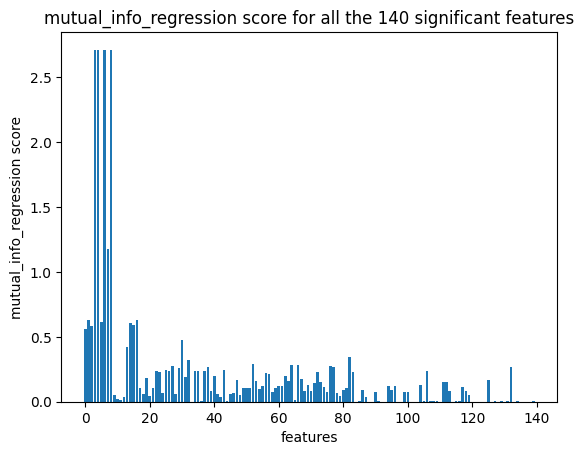

In [272]:
plt.bar([i for i in range(len(select_model.scores_))], select_model.scores_)
plt.title('mutual_info_regression score for all the 140 significant features')
plt.xlabel('features')
plt.ylabel('mutual_info_regression score')
plt.show()

In [275]:
chosen_indices = select_model.get_support(indices=True)
column_names = X_train_signi.columns
print('-'*50)
print('selected features using mutual_info_classif')
print('-'*50)
selected_column_names = column_names[chosen_indices]
print(selected_column_names)

--------------------------------------------------
selected features using mutual_info_classif
--------------------------------------------------
Index(['coffee_bar', 'florist', 'salad_bar', 'meat_sqft', 'frozen_sqft',
       'prepared_food', 'store_sqft', 'store_type', 'grocery_sqft',
       'occupation', 'gender', 'marital_status', '111', '112', '114', '118',
       '119', '234', '235', '237', '239', '110', '240', '248', '249', '250',
       '251', '252', '255', '245', '108', '236', '116', '115', '242', '109',
       '103', '48', '105', '7', '12', '95', '10', '4', '47', '254', '20', '9',
       '27', '96', '247', '34', '31', '107', '117', '41', '18', '16', '25',
       '253', '33', '100', '13', '102', '29', '32', '256', '37', '238', '94',
       '26', '36', '42', '99', '246', '28', '40', '0', '6', '97', '106', '45',
       '46', '243', '15', '44', '11', '24', '35', '39', '104', '244', '113',
       '5', '14', '19', '17', '43', '187', '101'],
      dtype='object')


In [276]:
X_train_select = X_train_signi[selected_column_names]
X_test_select = X_test_signi[selected_column_names]

In [277]:
X_train_select.to_csv('X_train_select.csv')
X_test_select.to_csv('X_test_select.csv')

In [278]:
X_train_select.shape, X_test_select.shape

((56582, 100), (14151, 100))